In [18]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
#choses backend pytorch here if it hasnt already

Compiling model...
'compile' took 0.000390 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.69e-01, 5.45e-01, 1.13e-02, 0.00e+00, 1.00e+00, 0.00e+00]    [1.70e-01, 5.49e-01, 1.11e-02, 0.00e+00, 1.00e+00, 0.00e+00]    []  
1000      [1.47e-04, 3.52e-05, 6.09e-06, 1.00e-07, 1.26e-07, 9.44e-10]    [9.21e-05, 1.66e-05, 4.99e-06, 1.00e-07, 1.26e-07, 9.44e-10]    []  
2000      [8.07e-05, 5.63e-05, 1.98e-05, 5.13e-07, 4.79e-07, 4.97e-11]    [6.23e-05, 5.53e-05, 1.94e-05, 5.13e-07, 4.79e-07, 4.97e-11]    []  
3000      [1.41e-05, 4.60e-06, 9.07e-07, 1.09e-08, 5.78e-09, 6.45e-12]    [6.08e-06, 4.27e-06, 6.32e-07, 1.09e-08, 5.78e-09, 6.45e-12]    []  
4000      [8.24e-06, 2.68e-06, 6.70e-07, 1.76e-08, 9.49e-09, 2.76e-10]    [3.68e-06, 2.59e-06, 5.25e-07, 1.76e-08, 9.49e-09, 2.76e-10]    []  
5000      [5.67e-06, 2.62e-06, 4.00e-07, 2.57e-09, 1.07e-09, 4.70e-13]

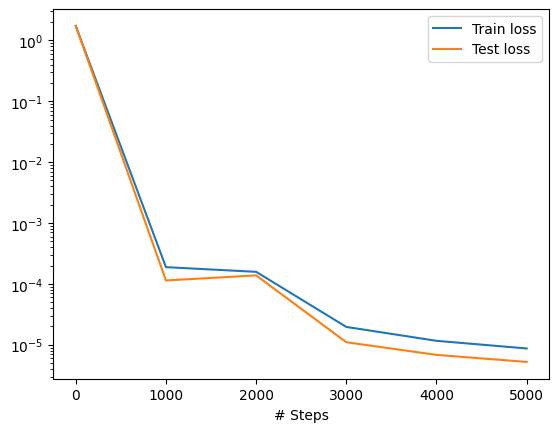

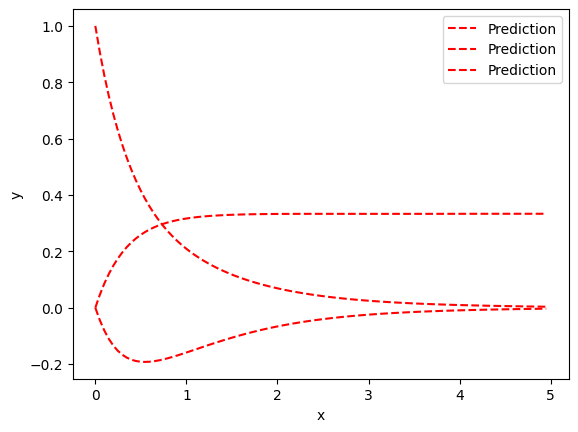

In [ ]:
t_max = 5

timedomain = dde.geometry.TimeDomain(0, t_max)

def ode_system(t, y):
    y1, y2, y3 = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    dy1_dt = dde.grad.jacobian(y, t, i=0) #look at the documentation for this if ur confused about what i and j are
    dy2_dt = dde.grad.jacobian(y, t, i=1) 
    dy3_dt = dde.grad.jacobian(y, t, i=2) 

    eq1 = dy1_dt + 2*y1 + y2
    eq2 = dy2_dt + y1 + 2*y2
    eq3 = dy3_dt - y1 - y2

    return [eq1, eq2, eq3]

def ics(t, on_initial):
    return on_initial and dde.utils.isclose(t[0],0) #checks if the point is on the initial condition
    #here t[0] has to be 0 because it is the only axis

"""
can use this instead of the lambda thing
def ic_value_y1(t):
    return 1

def ic_value_y2(t):
    return 0
"""

ic_y1 = dde.IC(timedomain, lambda x: 0, ics, component=0)
ic_y2 = dde.IC(timedomain, lambda x: 1, ics, component=1)
ic_y3 = dde.IC(timedomain, lambda x: 0, ics, component=2)

data = dde.data.PDE(timedomain, ode_system, [ic_y1, ic_y2, ic_y3], num_domain=400, num_boundary=2, num_test=100)

#IN THE NN LAYERS: The first one is the inputs so because we are in 1D it is 1, the second number is the hidden layers, the third number is the number of outputs.
net = dde.nn.FNN([1] + [50] * 3 + [3], "tanh", "Glorot normal") #here the last [3] has to be 3 because we have 3 equations. and the first [1] is 1 because we are in 1D
model = dde.Model(data, net)
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(iterations=5000)
dde.saveplot(losshistory, train_state, issave=False, isplot=True)